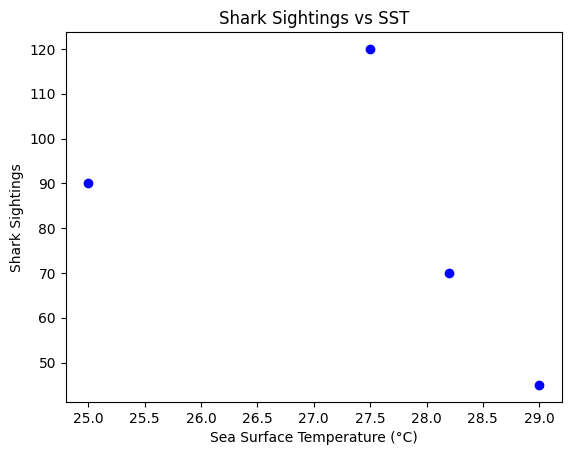

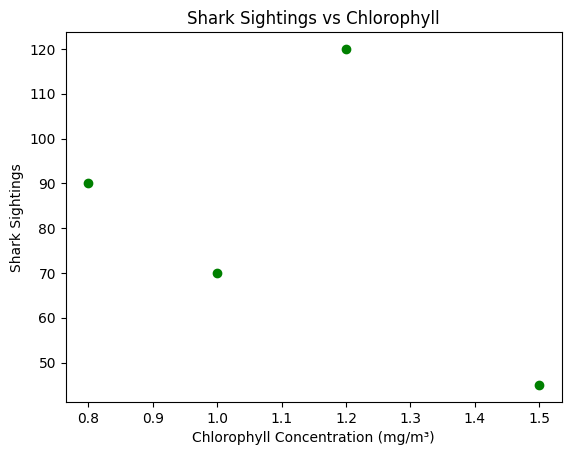

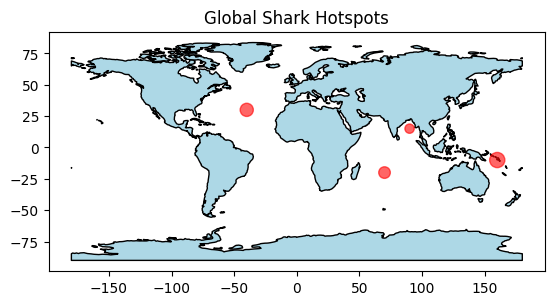

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets

# Example Shark dataset
data = {
    "Location": ["Pacific", "Atlantic", "Bay of Bengal", "Indian Ocean"],
    "Shark_Sightings": [120, 90, 45, 70],
    "SST": [27.5, 25.0, 29.0, 28.2],
    "Chlorophyll": [1.2, 0.8, 1.5, 1.0]
}
df = pd.DataFrame(data)

# Graph 1: Shark Sightings vs SST
plt.scatter(df["SST"], df["Shark_Sightings"], color="blue")
plt.xlabel("Sea Surface Temperature (°C)")
plt.ylabel("Shark Sightings")
plt.title("Shark Sightings vs SST")
plt.show()

# Graph 2: Shark Sightings vs Chlorophyll
plt.scatter(df["Chlorophyll"], df["Shark_Sightings"], color="green")
plt.xlabel("Chlorophyll Concentration (mg/m³)")
plt.ylabel("Shark Sightings")
plt.title("Shark Sightings vs Chlorophyll")
plt.show()

# World map using geodatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))
ax = world.plot(color="lightblue", edgecolor="black")

# Add dummy shark hotspots
df_map = pd.DataFrame({
    "Longitude": [160, -40, 90, 70],
    "Latitude": [-10, 30, 15, -20],
    "Sightings": [120, 90, 45, 70]
})
plt.scatter(df_map["Longitude"], df_map["Latitude"], 
            s=df_map["Sightings"], color="red", alpha=0.6)
plt.title("Global Shark Hotspots")
plt.show()


           Region   Latitude   Longitude  Sea_Surface_Temperature_C  \
0  Southern Ocean   8.867543   11.492423                       -0.5   
1   Bay of Bengal   2.811292  -50.274955                       17.8   
2     Arabian Sea  24.748877  143.110960                       10.6   
3      Bering Sea  58.602027  -75.409722                        2.9   
4         Red Sea -39.331525   32.815224                       13.0   

   Chlorophyll_mg_m3  Shark_Sightings  
0               2.78               23  
1               2.71               29  
2               0.49                8  
3               0.66               19  
4               0.44                5  


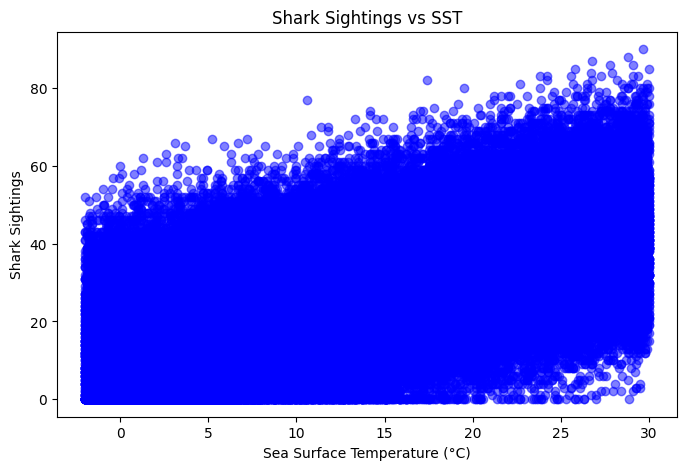

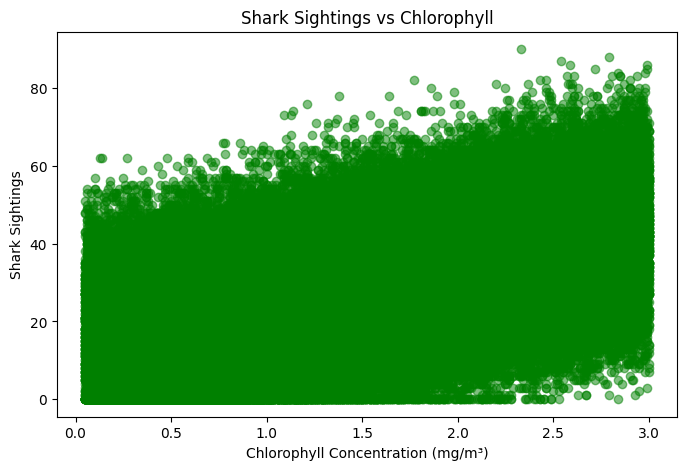

Map saved as 'shark_hotspots_map.html'. Open it in a browser to view.


In [1]:
# Step 1: Install required packages (run in Jupyter cell if not installed)
# !pip install pandas geopandas geodatasets folium

import pandas as pd
import geopandas as gpd
import geodatasets
import folium
from folium.plugins import HeatMap

# Step 2: Load your CSV data
df = pd.read_csv("global_shark_activity_100k.csv")

# Inspect data
print(df.head())

# Step 3: Plot basic scatter charts
import matplotlib.pyplot as plt

# Shark Sightings vs Sea Surface Temperature
plt.figure(figsize=(8,5))
plt.scatter(df["Sea_Surface_Temperature_C"], df["Shark_Sightings"], color="blue", alpha=0.5)
plt.xlabel("Sea Surface Temperature (°C)")
plt.ylabel("Shark Sightings")
plt.title("Shark Sightings vs SST")
plt.show()

# Shark Sightings vs Chlorophyll
plt.figure(figsize=(8,5))
plt.scatter(df["Chlorophyll_mg_m3"], df["Shark_Sightings"], color="green", alpha=0.5)
plt.xlabel("Chlorophyll Concentration (mg/m³)")
plt.ylabel("Shark Sightings")
plt.title("Shark Sightings vs Chlorophyll")
plt.show()

# Step 4: Create base world map using GeoDatasets
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

# Optional: Convert to folium base map (interactive)
m = folium.Map(location=[0, 0], zoom_start=2, tiles="CartoDB positron")

# Step 5: Add shark locations as markers
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=max(2, row["Shark_Sightings"]*0.05),  # scale circle by sightings
        color="red",
        fill=True,
        fill_opacity=0.6,
        popup=(f"Region: {row['Region']}<br>"
               f"SST: {row['Sea_Surface_Temperature_C']} °C<br>"
               f"Chlorophyll: {row['Chlorophyll_mg_m3']} mg/m³<br>"
               f"Shark Sightings: {row['Shark_Sightings']}")
    ).add_to(m)

# Step 6: Optional: Add HeatMap to visualize hotspots
heat_data = df[["Latitude", "Longitude", "Shark_Sightings"]].values.tolist()
HeatMap(heat_data, radius=15, max_zoom=6).add_to(m)

# Step 7: Save interactive map to HTML
m.save("shark_hotspots_map.html")
print("Map saved as 'shark_hotspots_map.html'. Open it in a browser to view.")

# Optional: Display in Jupyter Notebook



In [6]:
import streamlit as st
import pandas as pd
import folium
from streamlit_folium import st_folium
import numpy as np

df = pd.read_csv("global_shark_activity_100k.csv")

# Streamlit app
st.title("Live Shark Tracker")

# Map initialization
m = folium.Map(location=[0, 0], zoom_start=2)

# Simulate small random movements
df['Latitude'] += np.random.uniform(-0.1, 0.1, size=len(df))
df['Longitude'] += np.random.uniform(-0.1, 0.1, size=len(df))

for i in range(len(df)):
    folium.CircleMarker(
        location=[df['Latitude'].iloc[i], df['Longitude'].iloc[i]],
        radius=max(2, df['Shark_Sightings'].iloc[i]*0.05),
        color='red',
        fill=True,
        fill_opacity=0.6
    ).add_to(m)

st_folium(m, width=700, height=500)


2025-09-28 08:37:46.443 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-28 08:37:46.527 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-28 08:37:46.577 
  command:

    streamlit run C:\Users\atiku\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-28 08:37:46.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-28 08:40:10.543 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-28 08:40:10.621 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-28 08:40:10.661 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

{'last_clicked': None,
 'last_object_clicked': None,
 'last_object_clicked_tooltip': None,
 'last_object_clicked_popup': None,
 'all_drawings': None,
 'last_active_drawing': None,
 'bounds': {'_southWest': {'lat': -60.04944325254357,
   'lng': -180.09839339475036},
  '_northEast': {'lat': 60.07234445520171, 'lng': 180.0639880203021}},
 'zoom': 2,
 'last_circle_radius': None,
 'last_circle_polygon': None,
 'selected_layers': None}